# ONLINE PAYMENT FRAUD DETECTION PAYMENT 

In [1]:
# import libraries to work with


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## DATA SET

It's an online payment fraud detection dataset obtained from kaggle. Click here to visit the download page https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-datasetData 

It shows the 
step: represents a unit of time where 1 step equals 1 hour
type: type of online transaction
amount: the amount of the transaction
nameOrig: customer starting the transaction
oldbalanceOrg: balance before the transaction
newbalanceOrig: balance after the transaction
nameDest: recipient of the transaction
oldbalanceDest: initial balance of recipient before the transaction
newbalanceDest: the new balance of recipient after the transaction
isFraud: fraud transaction


In [2]:
##load dataset from csv using the read_csv() method of pandas

fraud_detection = pd.read_csv('Online Payments Fraud Detection Dataset.csv')

In [3]:
#view the top few rows of the data set with the head() method

fraud_detection.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# UNDERSTANDING THE DATA

An overview of the dataset

In [4]:
#the shape attribute 

fraud_detection.shape

(6362620, 11)

In [5]:
#the head of the data

fraud_detection.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
#the tail of the data

fraud_detection.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
#the info of the data

fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
#the view the column of the data

fraud_detection.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
#the summary statistics of the data

fraud_detection.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# CLEANING AND MANIPULATION OF THE DATASET

The data was filled with adequate informations as seen below, there are no missing data.


In [10]:
#checking the missing data

fraud_detection.isna().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# RELATIONSHIP & INSIGHTS

Several insights can be derived from this data, we can look at the positive correlation and negative correlation of the dataset using different categorical plots




In [11]:
#view the top few rows of the data set with the head() method

fraud_detection.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
#checking the correlations

fraud_detection.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

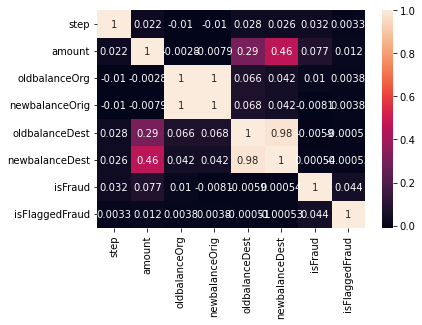

In [13]:
#visualize correlation using a seaborn heatmap

sns.heatmap(fraud_detection.corr(),annot=True)

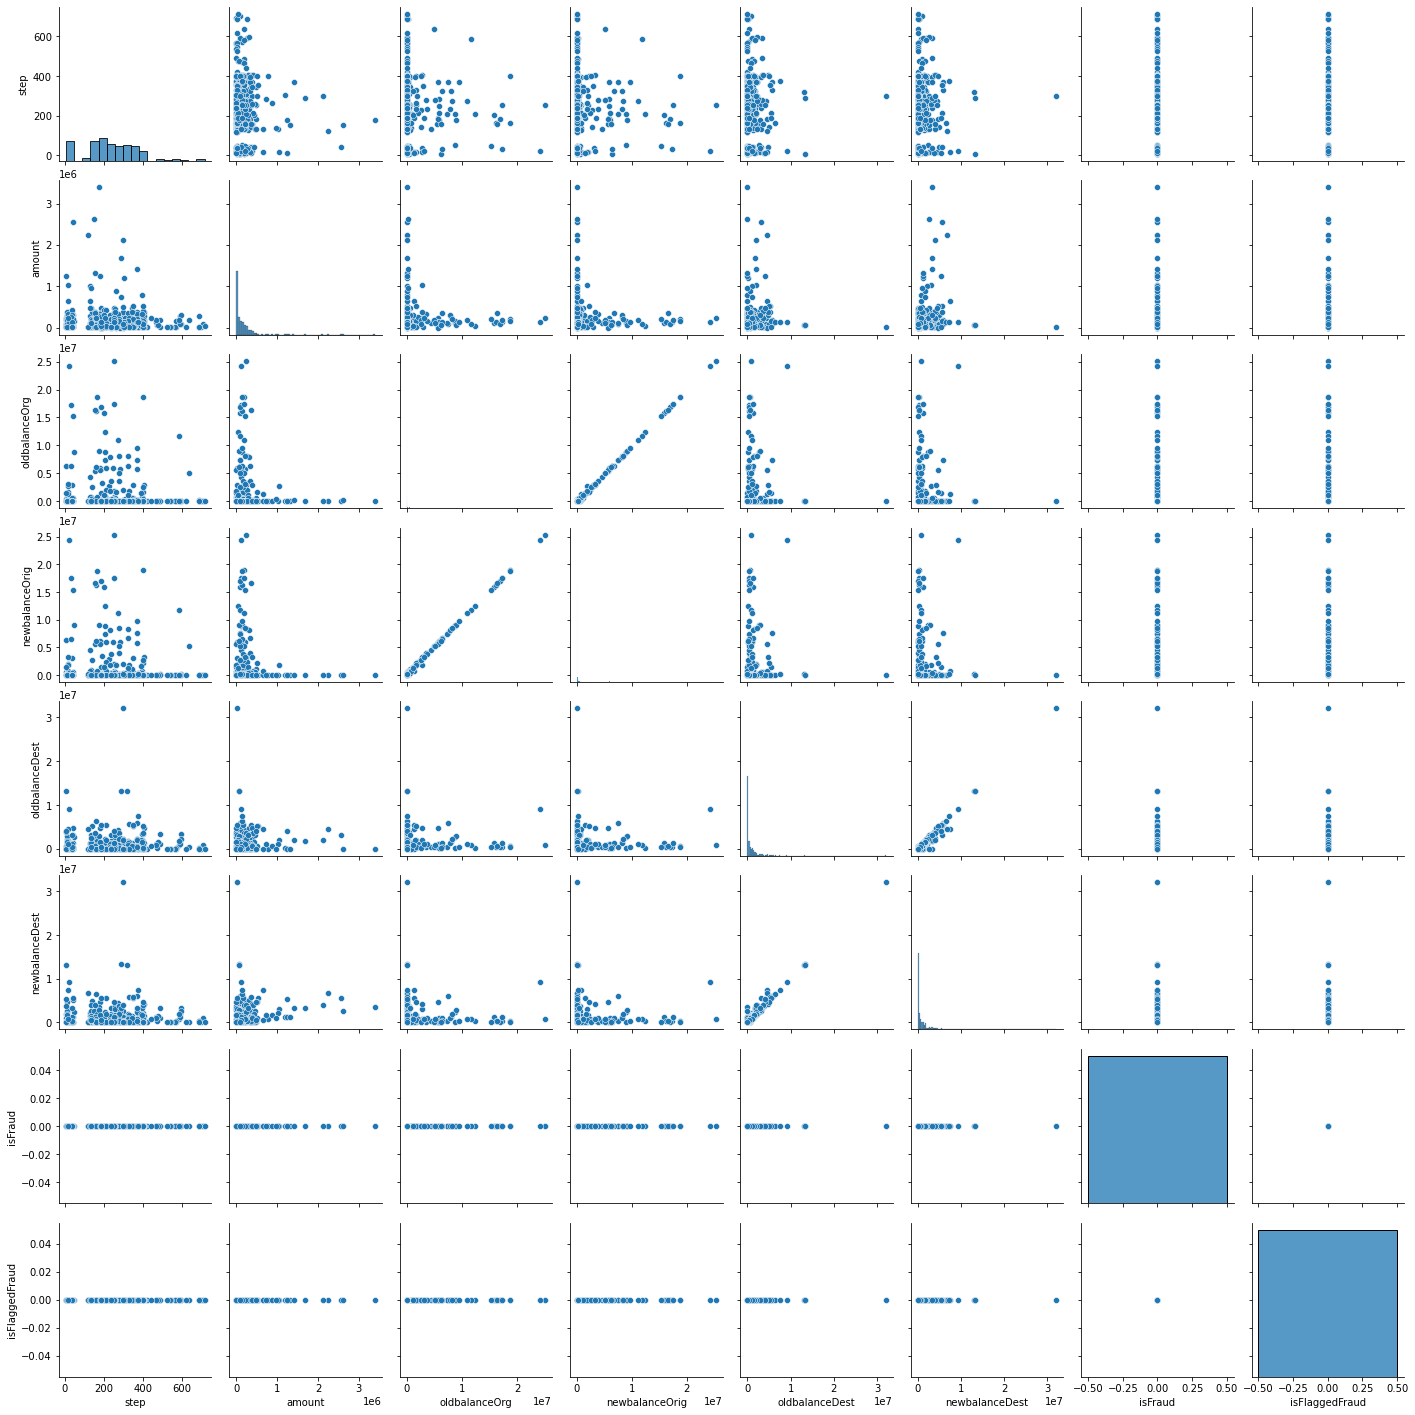

In [14]:
#visualize correlation a using seaborn pairplot

sns.pairplot(fraud_detection.sample(500))
plt.show()

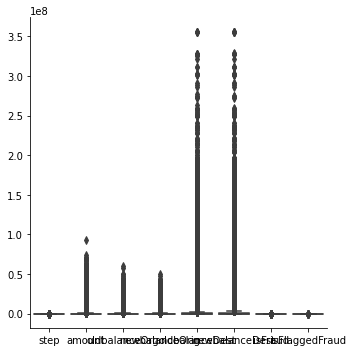

In [15]:
#visualize correlation using catplot

sns.catplot(data=fraud_detection,kind='box')


In [16]:
fraud_detection.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## EXPLANATORY DATA ANALYSIS

The pattern recognition of the fraud will be determined by the following



- total amount involved
- average time used
- total number of successful fraud and unsuccessful fraud
- total flagged and unflagged fraud
- total fraud attempted




Question base on the dataset

- most defrauded customers (amount against sender)

- average time used to defraud a sender (step against sender)

- type of online transactions with the highest Fraud(type against ifraud)

- type of online transaction earned by the receiver (type against newbalanceDest)

- most earned receiver(nameDest against newbalanceDest)

- flagged fraud (nameOrig against isFlaggedFraud)

- total amount involved in the fraud (amount against ifraud)


# the pattern recognition factors

In [17]:
#total amount involved

fraud_detection['amount'].sum()


1144392944759.77

(-25.0, 50.0)

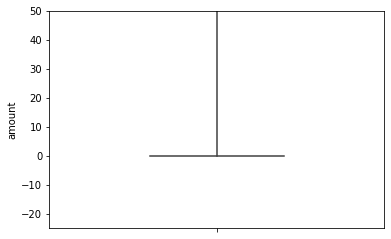

In [18]:
#visual for the total amount involved
sns.boxplot(y=fraud_detection.amount)
plt.ylim(-25,50)

In [19]:
#average time used

fraud_detection['step'].mean()

243.39724563151657

(-50.0, 100.0)

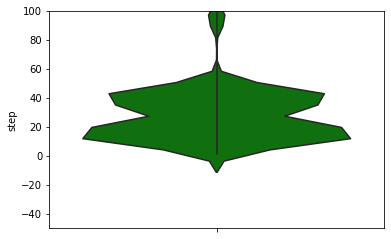

In [20]:
sns.violinplot(y=fraud_detection.step, color ='green')
plt.ylim(-50,100)

In [21]:
#total number of successful fraud and unsuccessful fraud
print('No of fraud transactions:{}, \n No of non-fraud transactions:{}'.format((fraud_detection.isFraud==1).sum(), (fraud_detection.isFraud==0).sum()))



No of fraud transactions:8213, 
 No of non-fraud transactions:6354407


In [22]:
#total flagged and unflagged fraud
print('No of frauds flagged :{}, \n No of frauds unflagged :{}'.format((fraud_detection.isFlaggedFraud==1).sum(), (fraud_detection.isFlaggedFraud==0).sum()))


No of frauds flagged :16, 
 No of frauds unflagged :6362604


In [23]:
#listing the senders

fraud_detection['nameOrig'].head()

0    C1231006815
1    C1666544295
2    C1305486145
3     C840083671
4    C2048537720
Name: nameOrig, dtype: object

In [24]:
#listing the channels used to defraud

fraud_detection['type'].head()

0     PAYMENT
1     PAYMENT
2    TRANSFER
3    CASH_OUT
4     PAYMENT
Name: type, dtype: object

In [25]:
#listing the receiver of the fraud

fraud_detection['nameDest'].head()

0    M1979787155
1    M2044282225
2     C553264065
3      C38997010
4    M1230701703
Name: nameDest, dtype: object

#insight for the financial institution 





Question 1#

who are the top 10 defrauded customers?


In [26]:
#top 10 defrauded customers

fraud_detection.groupby('nameOrig').amount.sum().sort_values(ascending=False)[::]

nameOrig
C1715283297    92445516.64
C2127282686    73823490.36
C2044643633    71172480.42
C1425667947    69886731.30
C1584456031    69337316.27
                  ...     
C1294472700           0.00
C69493310             0.00
C539112012            0.00
C832555372            0.00
C2088151490           0.00
Name: amount, Length: 6353307, dtype: float64

In [27]:
#top 10 defrauded customers

fraud_detection.groupby('nameOrig').amount.sum().sort_values(ascending=False)[:10]

nameOrig
C1715283297    92445516.64
C2127282686    73823490.36
C2044643633    71172480.42
C1425667947    69886731.30
C1584456031    69337316.27
C811810230     67500761.29
C420748282     66761272.21
C1139847449    64234448.19
C300140823     63847992.58
C372535854     63294839.63
Name: amount, dtype: float64

In [28]:
#top 10 defrauded customers assigned to top10_customers

top10_customers = fraud_detection.groupby('nameOrig').amount.sum().sort_values(ascending=False)[:10]


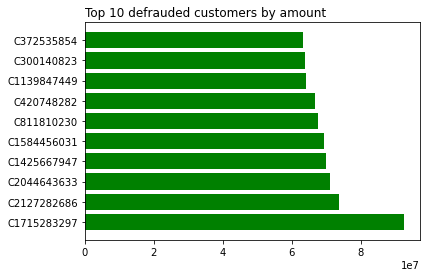

In [29]:
#use horizontal bar chart to visualize top 10 defrauded customers
#use the series index as vertical axis and series values as horizontal axis of the barh() plot
plt.title('Top 10 defrauded customers by amount',
             loc ='left', )
plt.barh(y=top10_customers.index, width=top10_customers, color='green')

plt.show()

Question 2#

What is the average time used to defraud a customer?


In [30]:
#average time used to defraud a customers

fraud_detection.groupby('nameOrig').step.mean().sort_values(ascending=False)[::]

nameOrig
C2013999242    743.0
C786484425     743.0
C1162922333    743.0
C1685995037    743.0
C1529008245    743.0
               ...  
C695248316       1.0
C1048332309      1.0
C1412322831      1.0
C703627308       1.0
C1223303171      1.0
Name: step, Length: 6353307, dtype: float64

Question 3#

Which of the online payment mode has the highest fraud?


In [31]:
#online transaction with the highest fraud

fraud_detection.groupby('type').isFraud.count().sort_values(ascending=False)[:5]

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: isFraud, dtype: int64

In [32]:
#assigning type to the online transaction by the number of transaction

type =fraud_detection.groupby('type').isFraud.count().sort_values(ascending=False)[:5]

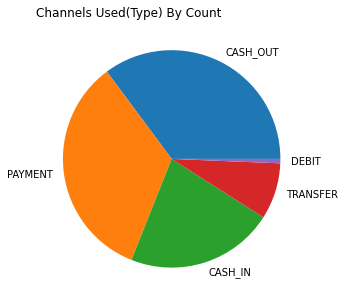

In [33]:
#using pie chart to visualize the type

#let's try a pie chart


plt.figure(figsize=(5,5))
plt.pie(type,labels=type.index)

plt.title('Channels Used(Type) By Count',
             loc ='left', )
plt.show()

Question 4#

Who received the most from the fraud?


In [34]:
fraud_detection.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [35]:
#top 10 receiver of the fraud that earned the most

fraud_detection.groupby('nameDest').newbalanceDest.sum().sort_values(ascending=False)[:10]

nameDest
C439737079     4.517028e+09
C707403537     3.959716e+09
C172409641     3.454800e+09
C268913927     3.149511e+09
C936857833     3.118189e+09
C65111466      3.092684e+09
C97730845      2.986055e+09
C20253152      2.954876e+09
C1883840933    2.804566e+09
C310383504     2.716940e+09
Name: newbalanceDest, dtype: float64

In [36]:
#assigning top 10 earner from the fraud

top10_earners = fraud_detection.groupby('nameDest').newbalanceDest.sum().sort_values(ascending=False)[:10]

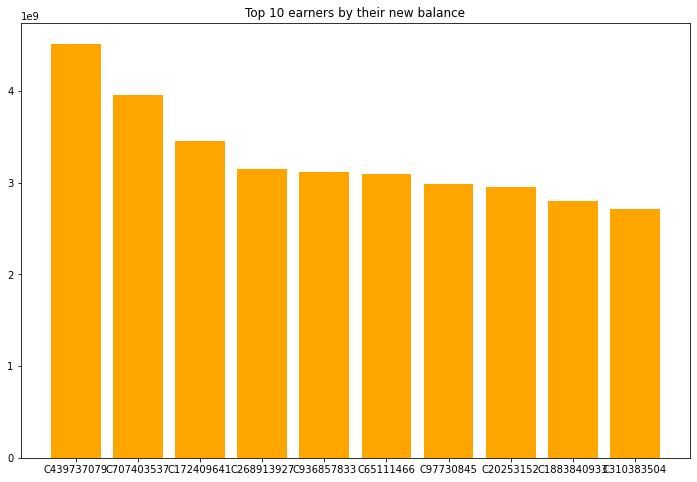

In [37]:
# use vertical plot bar to visualize top 10 earners from the fraud

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

plt.title('Top 10 earners by their new balance')
plt.bar(x=top10_earners.index[:10], height=top10_earners[:10], color='orange')

plt.show()


Question 5#

the online mode of transaction that fraud was easily done/earned from

type of online transaction earned by the receiver (type against newbalanceDest)

In [38]:
#online transaction with the highest amount defrauded

fraud_detection.groupby('type').newbalanceDest.sum().sort_values(ascending=False)[::]

type
CASH_OUT    3.784342e+12
CASH_IN     2.052897e+12
TRANSFER    1.894261e+12
DEBIT       6.268676e+10
PAYMENT     0.000000e+00
Name: newbalanceDest, dtype: float64

In [39]:
#assigning hightest_type to the online transaction

highest_type = fraud_detection.groupby('type').newbalanceDest.sum().sort_values(ascending=False)[::]

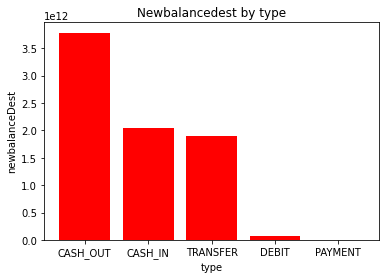

In [46]:
#use vertical bar chart to visualize highest amount received by the receiver by type

plt.bar(x=highest_type.index[:10], height=highest_type[:10],color = 'red')

plt.title('Newbalancedest by type')
plt.xlabel('type')
plt.ylabel('newbalanceDest')

plt.show()


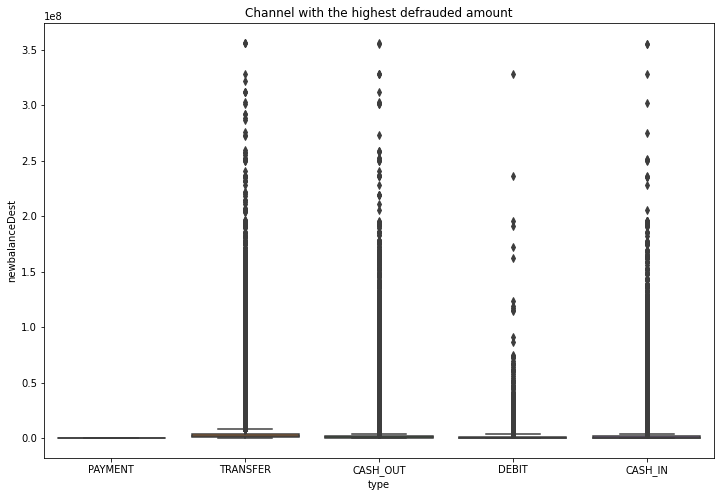

In [41]:
#use vertical boxplot to visualize highest amount defrauded​ by type
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

plt.title('Top 10 earners')


plt.title('Channel with the highest defrauded amount')
sns.boxplot(x='type', y='newbalanceDest', data=fraud_detection)

plt.show()

Question 6#

who are the defrauded customers that flagged the fraud

flagged fraud (nameOrig against isFlaggedFraud)

In [42]:
#customers that reported the fraud

fraud_detection.groupby('nameOrig').isFraud.count().sort_values(ascending=False)[:10]

nameOrig
C1065307291    3
C1784010646    3
C1902386530    3
C1832548028    3
C545315117     3
C1462946854    3
C2051359467    3
C363736674     3
C1976208114    3
C1530544995    3
Name: isFraud, dtype: int64